# 📺 Netflix Content Analysis

This notebook provides a complete exploratory data analysis (EDA) of Netflix titles dataset using Python (Pandas, Seaborn, Matplotlib). It covers data cleaning, outlier detection, and visual analysis of movies and shows.

## 📁 Load Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## 🧾 Dataset Overview
Quick look at column names, data types, and missing values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

# Check NULL

In [19]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

## 🧹 Data Cleaning
Handle missing values and fix inconsistent formatting.

In [20]:
# Fill nulls in specific columns
df['description'] = df['description'].fillna('No Description')
df['age_certification'] = df['age_certification'].fillna('Unrated')
df['imdb_id'] = df['imdb_id'].fillna('N/A')
df['production_countries'] = df['production_countries'].replace('[]', 'Unknown')

# Drop rows with missing title
df = df.dropna(subset=['title'])

In [21]:
# Fill missing values with averages for numeric columns
for col in ['imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

## 🔍 Duplicate Check

In [22]:
df[df.duplicated(subset=['title', 'release_year', 'type'])]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


## ✅ Movie vs Show Distribution

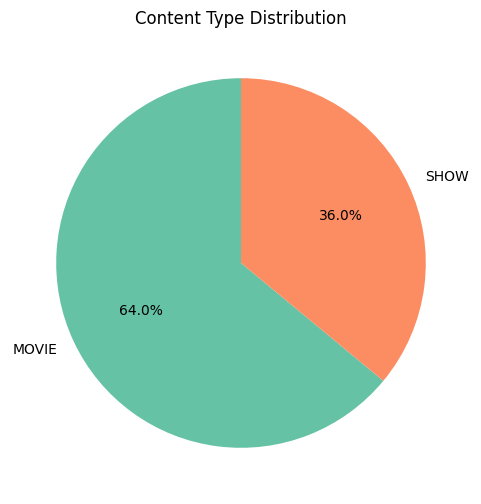

In [23]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Content Type Distribution')
plt.ylabel('')
plt.show()

## 📅 Content by Release Year

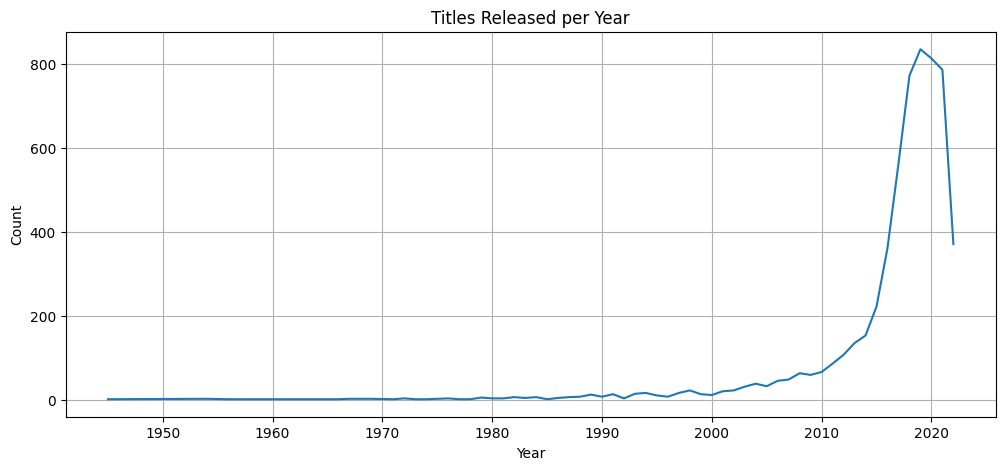

In [24]:
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 🌍 Top Production Countries

C:\Users\sheri\AppData\Local\Temp\ipykernel_13768\3486618801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


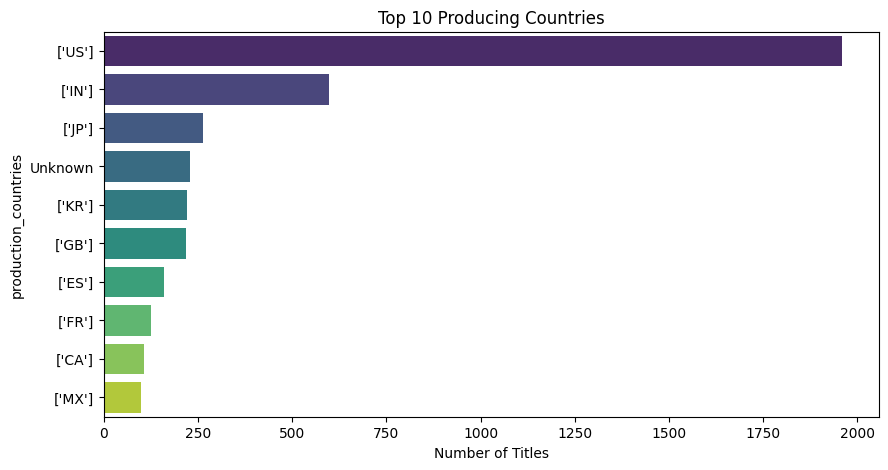

In [25]:
top_countries = df['production_countries'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Producing Countries')
plt.xlabel('Number of Titles')
plt.show()

## 🎭 Genre Distribution

C:\Users\sheri\AppData\Local\Temp\ipykernel_13768\3003045205.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')


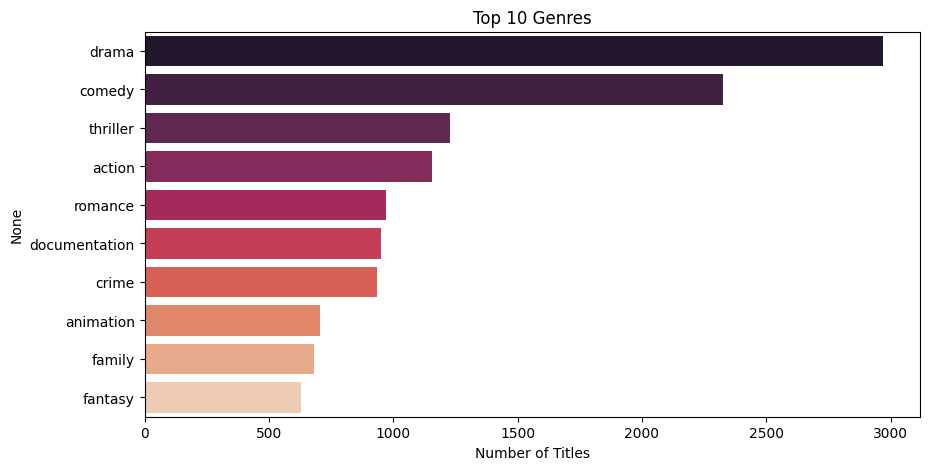

In [26]:
from collections import Counter

genre_series = df['genres'].dropna().apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else [x])
genres_flat = [genre.strip() for sublist in genre_series for genre in sublist if genre]
genre_counts = pd.Series(Counter(genres_flat)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.show()

## ⚠️ Runtime Outlier Detection

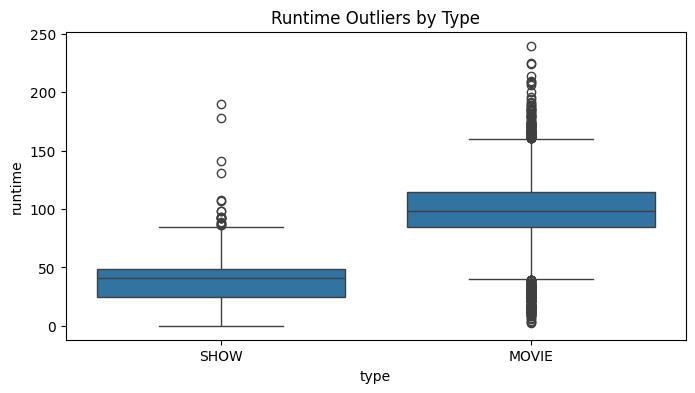

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='type', y='runtime')
plt.title('Runtime Outliers by Type')
plt.show()

## ⏱️ Longest Titles by Runtime

In [28]:
df['hours'] = df['runtime'] // 60
df['minutes'] = df['runtime'] % 60
df['formatted_duration'] = df['hours'].astype(str) + ':' + df['minutes'].astype(str).str.zfill(2)

# Top longest titles
longest = df[['title', 'type', 'runtime', 'formatted_duration']].sort_values(by='runtime', ascending=False).head(10)
longest

,title,type,runtime,formatted_duration
923,Bonnie & Clyde,MOVIE,240,4:00
438,A Lion in the House,MOVIE,225,3:45
347,Lagaan: Once Upon a Time in India,MOVIE,224,3:44
412,Jodhaa Akbar,MOVIE,214,3:34
406,Kabhi Khushi Kabhie Gham,MOVIE,210,3:30
3076,The Irishman,MOVIE,209,3:29
351,No Direction Home: Bob Dylan,MOVIE,208,3:28
166,Hum Aapke Hain Koun..!,MOVIE,206,3:26
2495,Jab Harry Met Sejal,MOVIE,200,3:20
265,Apocalypse Now Redux,MOVIE,196,3:16


## ✅ Conclusion
- Majority of content is movies.
- The most popular genres include dramas and comedy.
- Runtime outliers were identified especially in some shows.
- The dataset required cleaning in multiple fields.